In [8]:
#16. Generate a correlation matrix for all numeric features in the dataset.
!pip install seaborn

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns

In [9]:
# loading data set as Pandas dataframe
df = pd.read_csv('cybersecurity_attacks.csv')
print(df.head())

             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  ... Action Taken  \
0  Qui natus

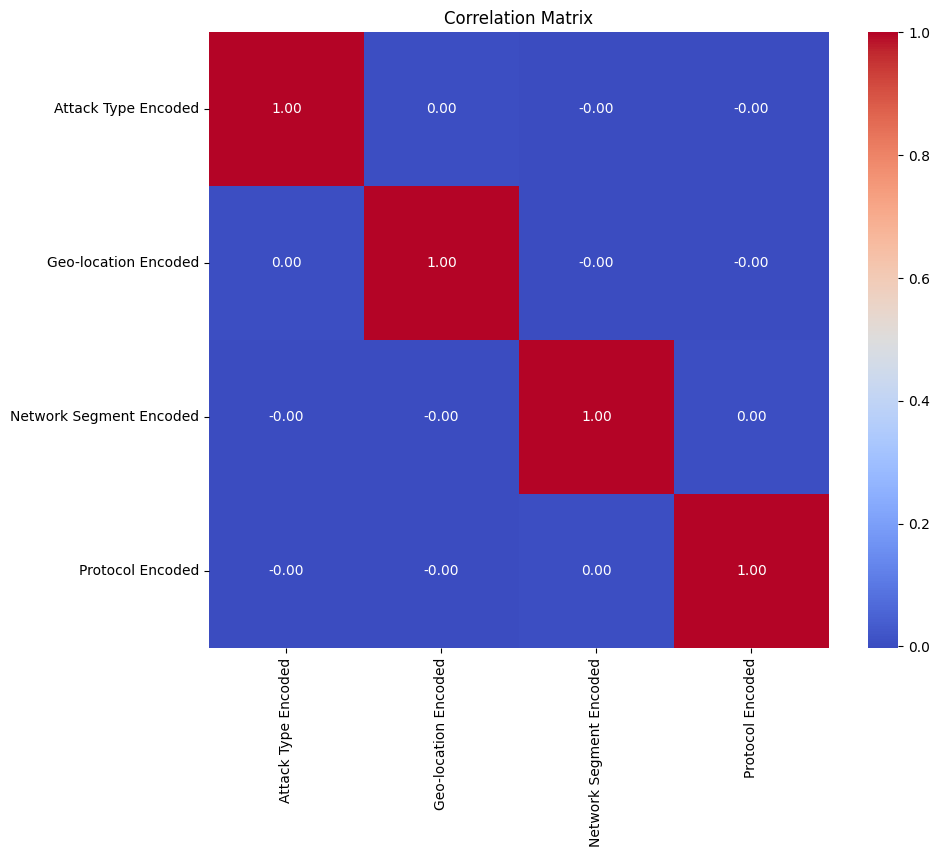

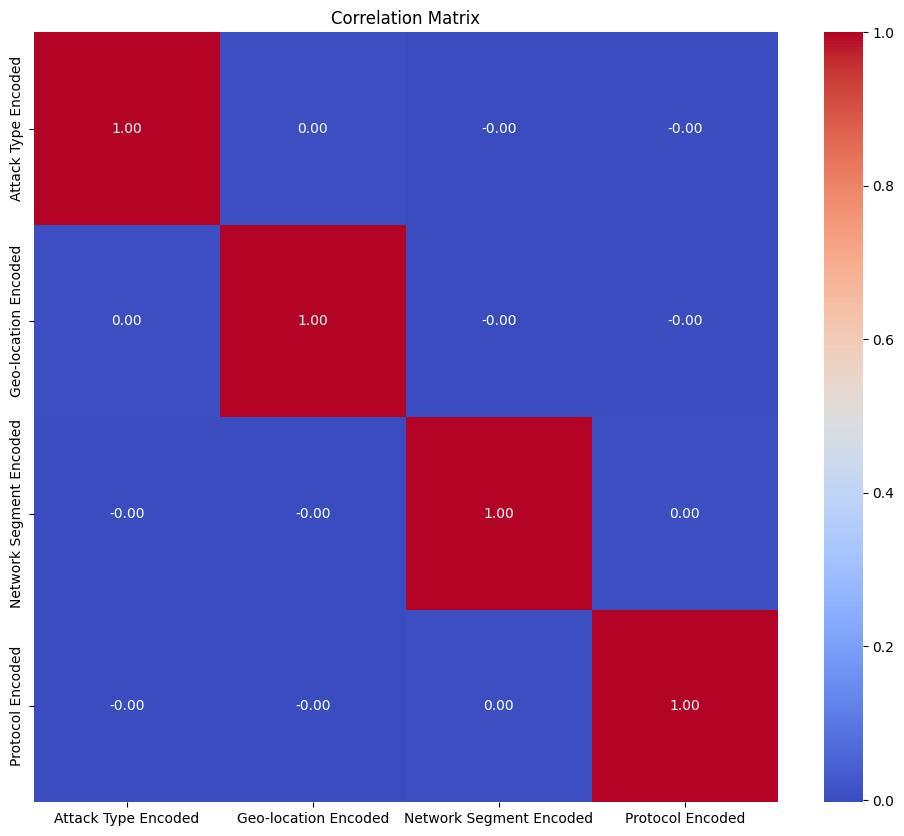

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract time-based features
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek

# Convert categorical columns to numerical values
df['Attack Type Encoded'] = df['Attack Type'].astype('category').cat.codes
df['Geo-location Encoded'] = df['Geo-location Data'].astype('category').cat.codes
df['Network Segment Encoded'] = df['Network Segment'].astype('category').cat.codes
df['Protocol Encoded'] = df['Protocol'].astype('category').cat.codes

# Select relevant columns
correlation_columns = df[['Attack Type Encoded', 'Geo-location Encoded', 'Network Segment Encoded', 'Protocol Encoded']]

# Handle missing values (drop rows with NaN or fill with a default value)
correlation_columns_cleaned = correlation_columns.dropna()

# Compute correlation matrix
correlation_matrix = correlation_columns_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


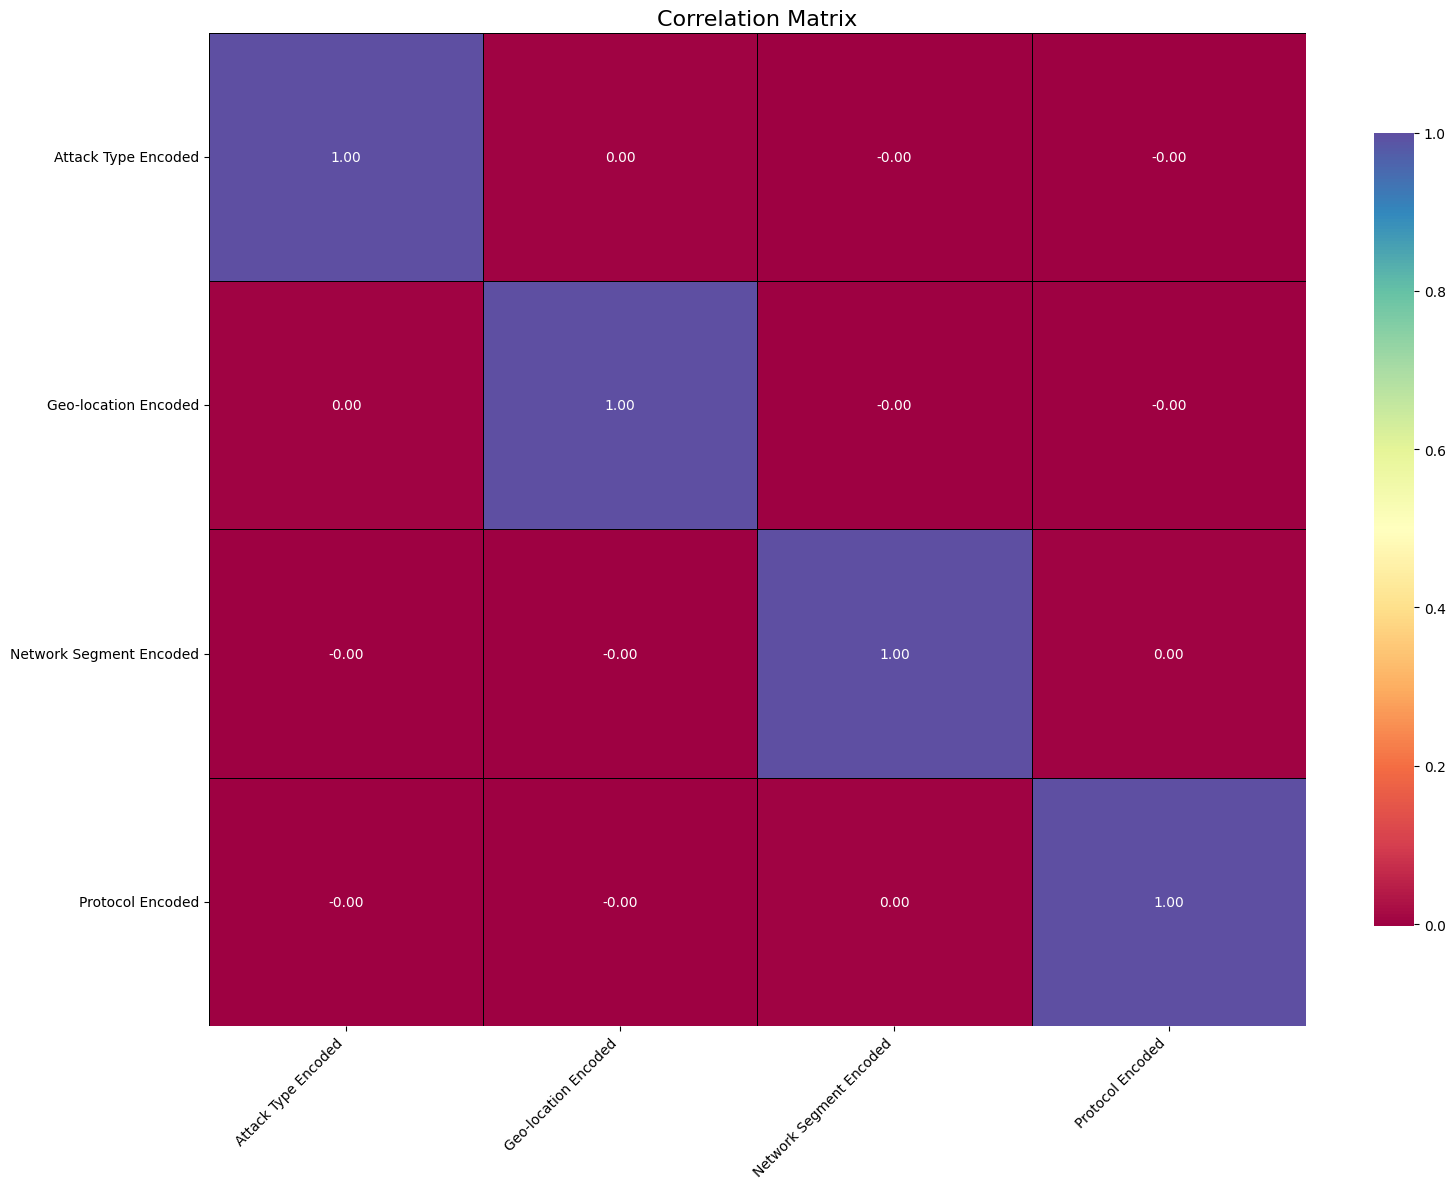

In [29]:
#18. Visualize the correlation matrix using a heatmap.
# Set up the matplotlib figure with increased size
plt.figure(figsize=(16, 12))  # Adjust the size to accommodate more columns

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Spectral', 
            xticklabels=correlation_matrix.columns, 
            yticklabels=correlation_matrix.columns,
            cbar_kws={"shrink": .8},  # Shrink color bar for better layout
            linewidths=0.5,  # Add lines between cells for better separation
            linecolor='black')  # Color of the lines

# Rotate x and y tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels
plt.yticks(rotation=0, fontsize=10)  # Rotate y labels

# Add titles and labels
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()  # Automatically adjust subplot parameters for a nicer fit
plt.show()

In [21]:
print(df.columns)

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'Attack Type Encoded',
       'Region Encoded'],
      dtype='object')


In [22]:
print(correlation_matrix.columns)

Index(['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'Attack Type Encoded',
       'Region Encoded'],
      dtype='object')


In [26]:
# Ensure the encoded version is used
column1 = df['Attack Type Encoded']
column2 = df['Region Encoded']

# Calculate the correlation
correlation = column1.corr(column2)
print(f"The correlation is: {correlation:.2f}")


The correlation is: 0.00
